In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
PATH = "../data/201123_measurements_2"

In [5]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['00f1f686-ae67-43d0-85c9-3dd30588e0ea.csv',
 '046f8844-0434-4114-bfa3-6667821aba8d.csv',
 '072adc29-c59b-4668-9a1c-030fca921d8f.csv',
 '0afa6dbb-a8e4-4006-ad7d-ec4bc4f99dbc.csv',
 '0b2ae3eb-1cd1-49cf-ab6e-f73b05e4e6d4.csv',
 '0b5416de-cfb3-4631-a76a-7aadaeb77214.csv',
 '0cc3189f-5bf4-4d7a-94b6-e852927af6a4.csv',
 '0fb3c8da-2ddc-4fc7-825e-3c898580e3de.csv',
 '133be29e-6f7f-4da4-ae09-610a6304c7cc.csv',
 '14e8e8d4-b46f-4671-8f3a-3c90d7a3397a.csv',
 '160b8238-6352-42da-89ab-1a6475a262eb.csv',
 '255332cf-bfc8-46bf-b8ca-c24a7fadf911.csv',
 '2924124a-4f98-45da-b29e-dae9d4344b48.csv',
 '2a0d42be-8bf7-4614-84b2-d38581b5e073.csv',
 '3439e753-c12a-4226-a7e7-98976b25cfd1.csv',
 '384a6eb2-58c9-417e-b6a4-deedc2093788.csv',
 '388b3c12-cbbf-4187-ac07-af5ab80382da.csv',
 '3d8f968f-b6c4-4fbf-bbcb-acc7b4f470ad.csv',
 '4224e316-06c4-4618-95bd-990605067259.csv',
 '42a648f9-5860-49c4-bc26-c98003cd1ce4.csv',
 '45fc4c3a-545a-42f6-b9a5-d8467ae5267e.csv',
 '4ed09c6e-94c4-468d-87fb-7ceaa6fee9b6.csv',
 '521acafe

In [6]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data = pd.concat(dataframes)

## End-to-end latencies with and without running framework tester
### Complexity: Default

Almost the same -> no additional latency with framework tester

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_5180\2073509604.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


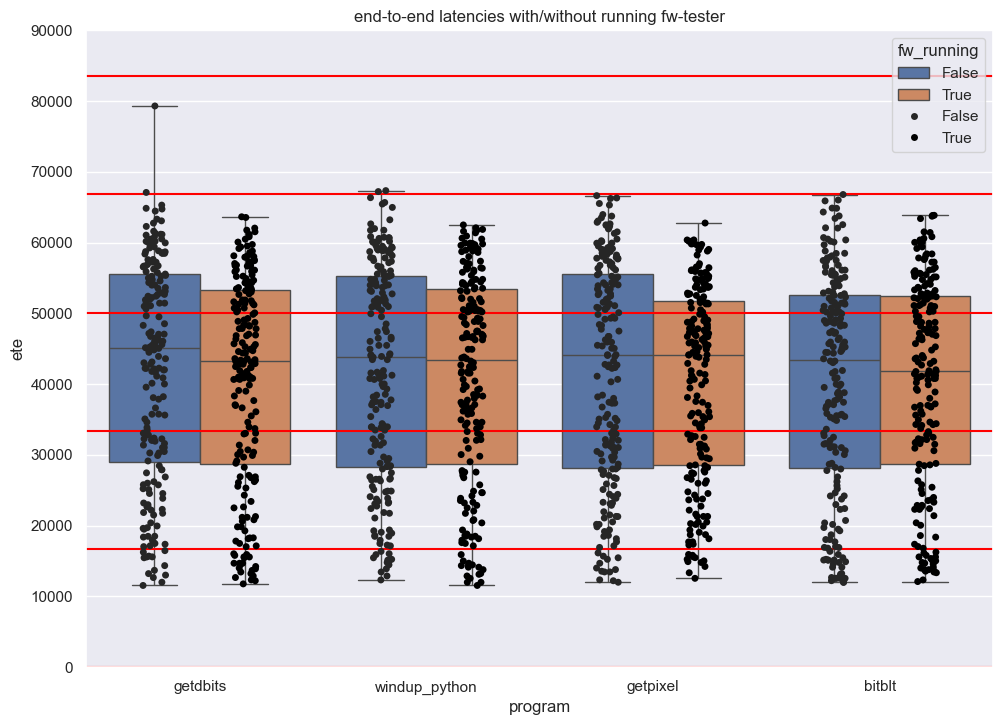

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 90000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

### Complexity: Rects

Also, no additional latency (even faster with running framework tester)

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_5180\2673393491.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


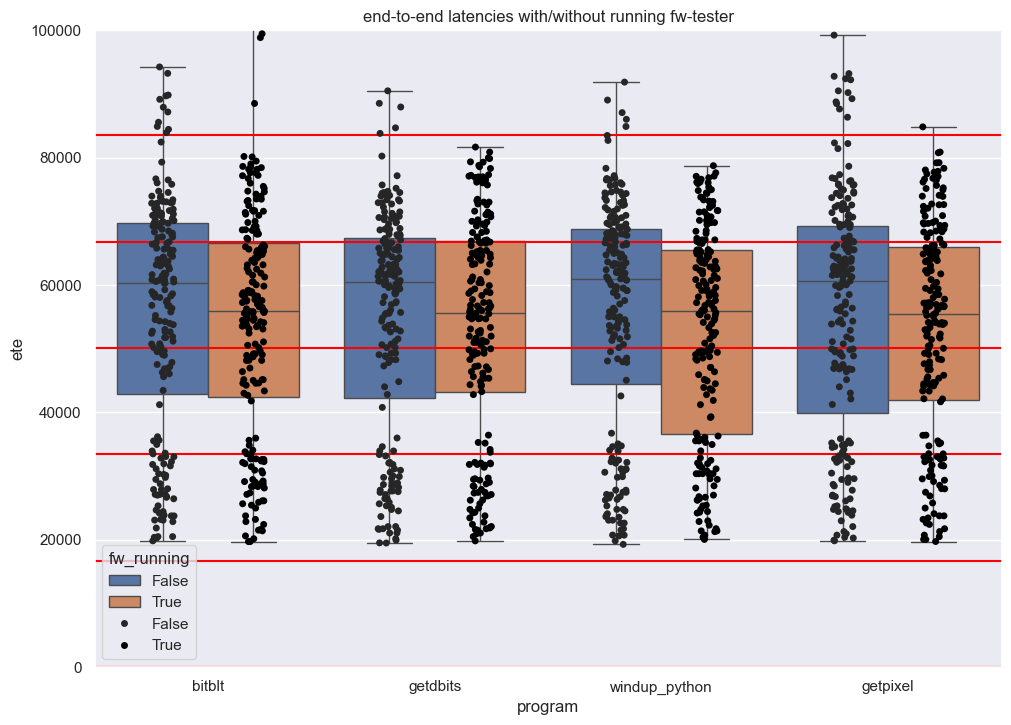

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 100000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

## Framework latency by framework
### Complexity: Default

no results for pyqt5 and wxpython because of border

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_5180\3975482710.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[(data['complexity'] == 'default') & (data['fw_running'] == True)], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 30000.0)

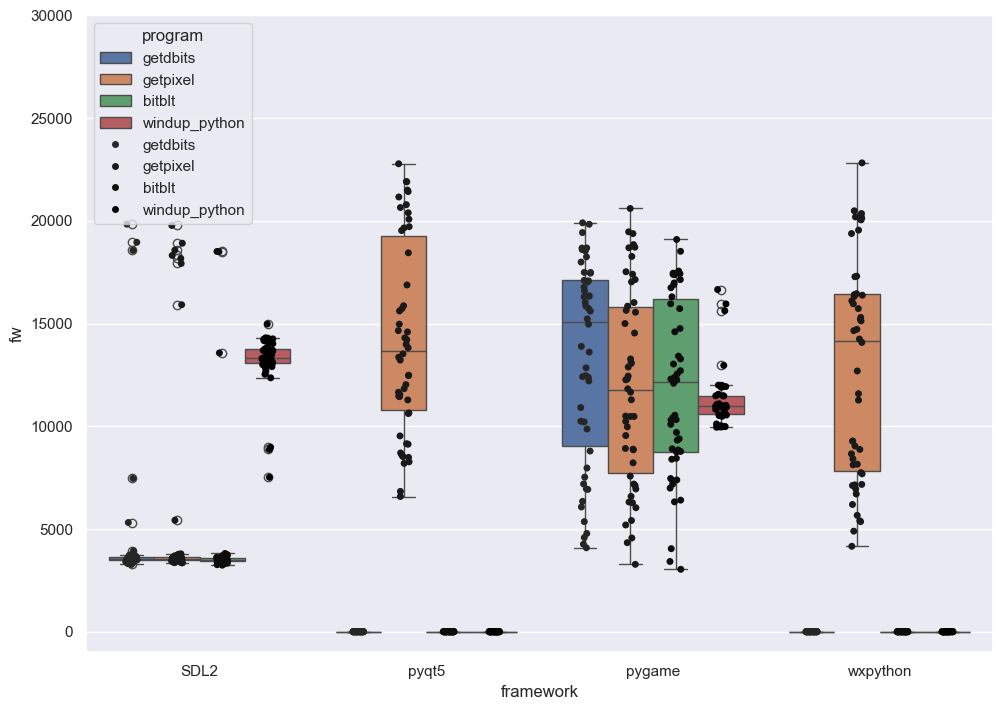

In [9]:
sns.boxplot(data=data[(data['complexity'] == 'default') & (data['fw_running'] == True)], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[(data['complexity'] == 'default') & (data['fw_running'] == True)], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 30000)

### Cpmplexity: Rects

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_5180\1946915192.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[(data['complexity'] == 'rects') & (data['fw_running'] == True)], x='framework', y='fw', hue='program', dodge=True, color='black')


<Axes: xlabel='framework', ylabel='fw'>

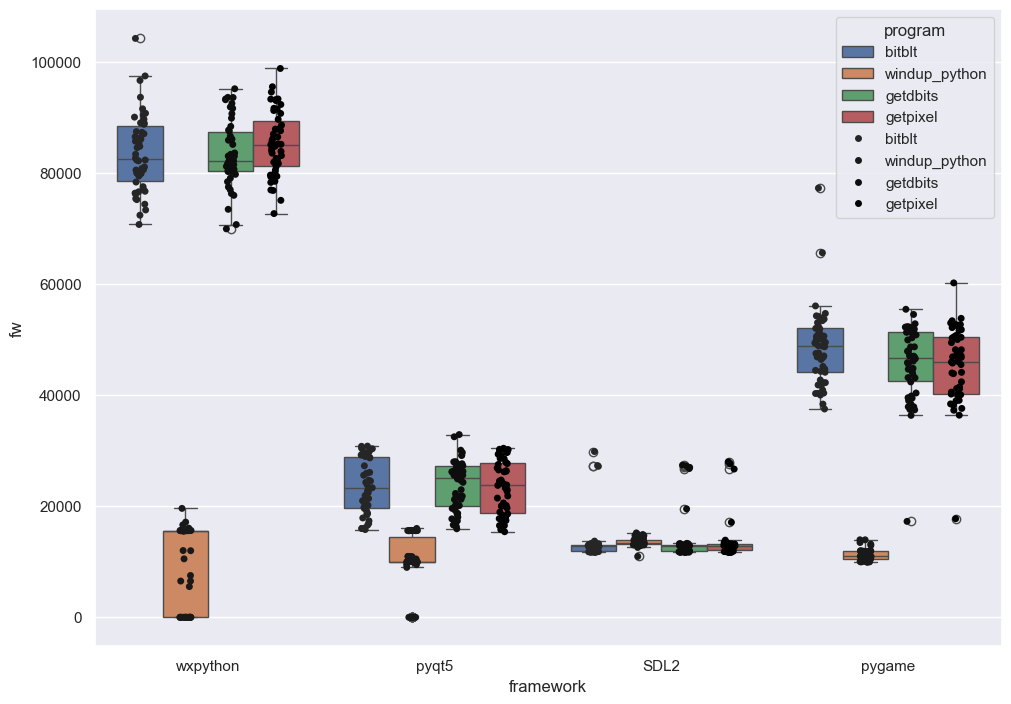

In [10]:
sns.boxplot(data=data[(data['complexity'] == 'rects') & (data['fw_running'] == True)], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[(data['complexity'] == 'rects') & (data['fw_running'] == True)], x='framework', y='fw', hue='program', dodge=True, color='black')

### Framework latency by complexity

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_5180\3399512195.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')


(-5000.0, 150000.0)

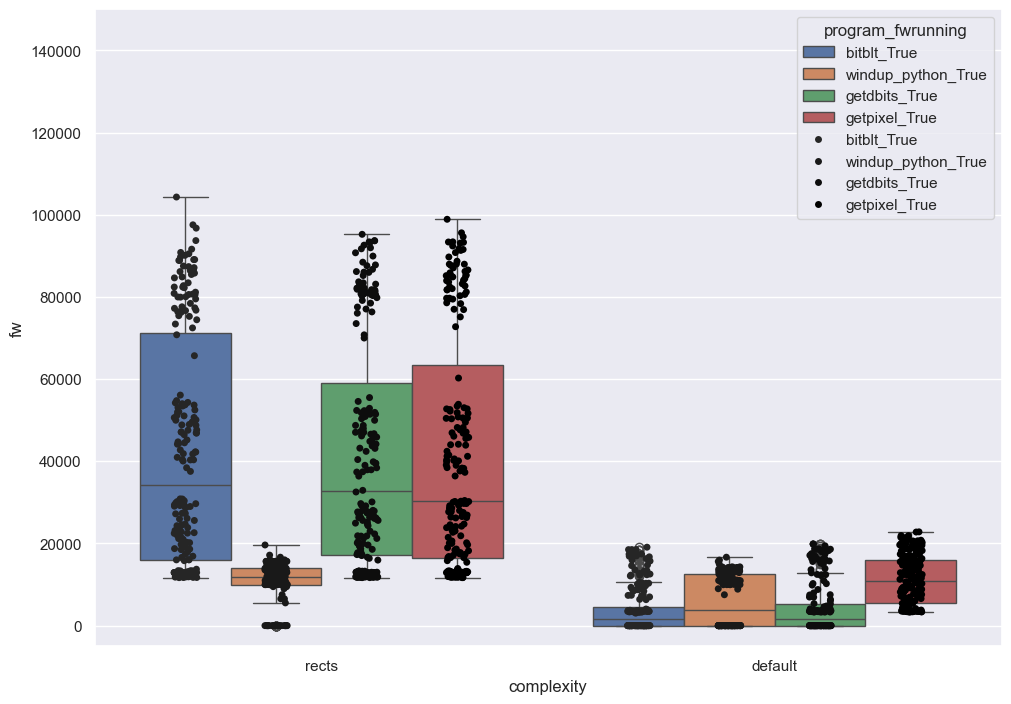

In [11]:
sns.boxplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-5000, 150000)

### Framework latency by framework

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_5180\3585093180.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='framework', dodge=True, color='black')


(-5000.0, 150000.0)

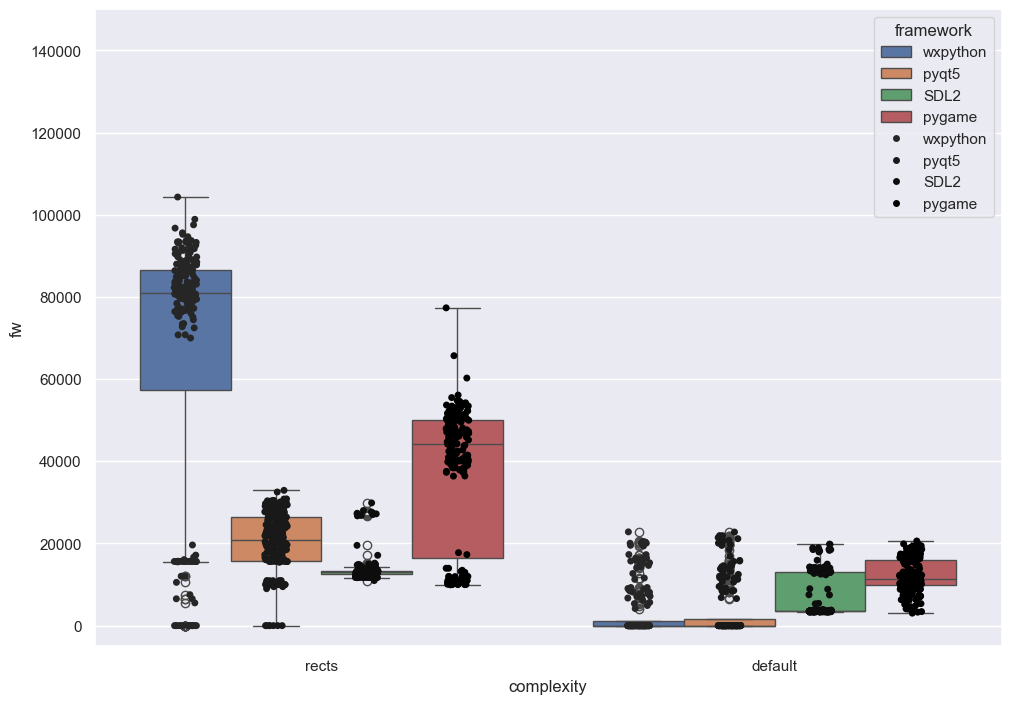

In [12]:
sns.boxplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='framework', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='framework', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-5000, 150000)

## Difference (ete and fw) by program
### Complexity: Rects

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_5180\3782428070.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[(data['fw_running'] == True) & (data['complexity'] == 'rects')], x='framework', y='diff', hue='program', dodge=True, color='black')


(-80000.0, 80000.0)

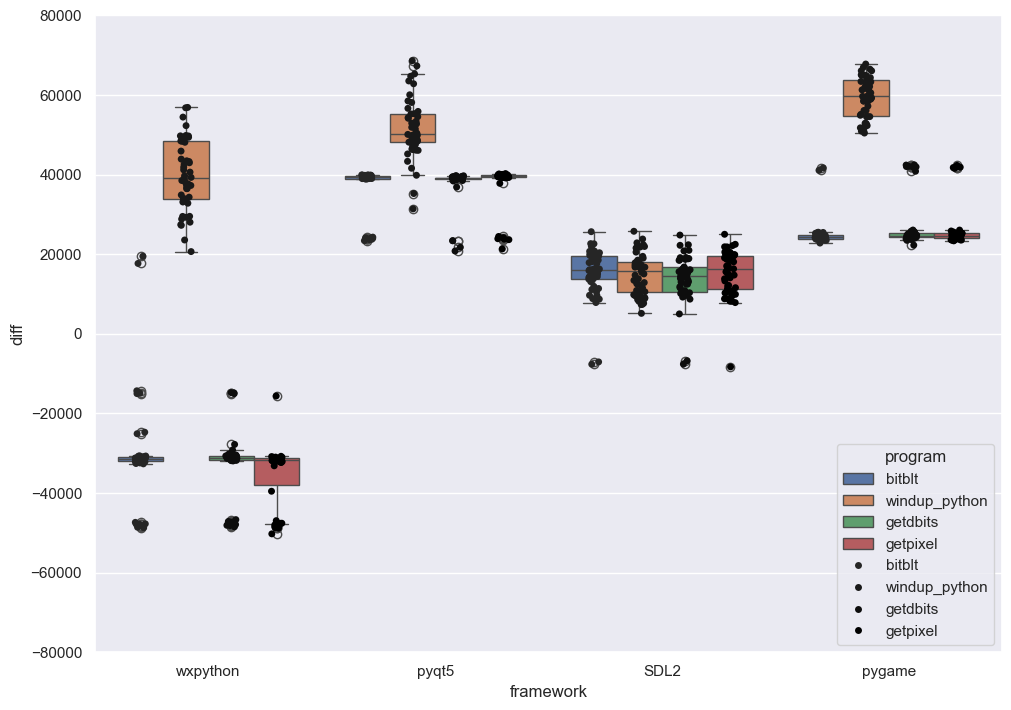

In [13]:
sns.boxplot(data=data[(data['fw_running'] == True) & (data['complexity'] == 'rects')], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[(data['fw_running'] == True) & (data['complexity'] == 'rects')], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-80000, 80000)

### Complexity: Default

C:\Users\Martina Emmert\AppData\Local\Temp\ipykernel_5180\293663102.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[(data['fw_running'] == True) & (data['complexity'] == 'rects')], x='framework', y='diff', hue='program', dodge=True, color='black')


(-80000.0, 80000.0)

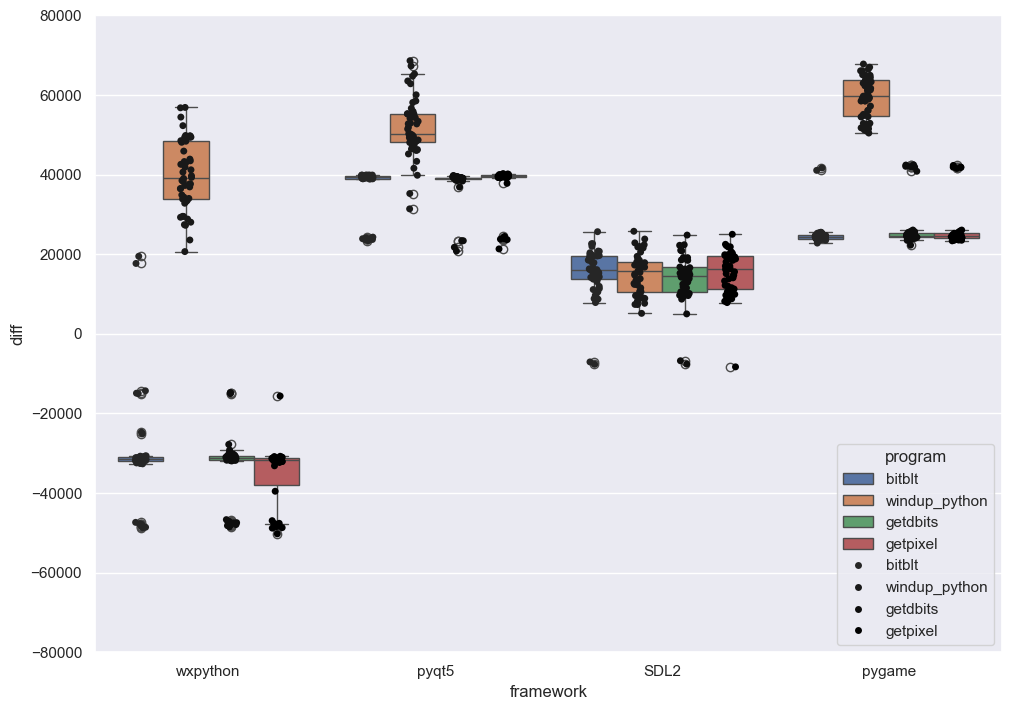

In [14]:
sns.boxplot(data=data[(data['fw_running'] == True) & (data['complexity'] == 'default')], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[(data['fw_running'] == True) & (data['complexity'] == 'default')], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-80000, 80000)